In [261]:
#IMPORTING THE DATA

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [234]:
data=pd.read_csv("C:/Users/Mansha/Downloads/Assignment3.csv")
print(data)

      x1      x2     x3     x4     x5        y
0   7.11 -447.71 135.66  92.41  96.04  9131.40
1   7.06 -455.33  94.49  91.76  92.16  9001.86
2   6.89 -466.86 186.25  89.54 100.00  8595.85
3   7.25 -440.53 176.83  94.24  84.64  9469.94
4   7.24 -445.92 185.90  94.11  88.36  9448.98
..   ...     ...    ...    ...    ...      ...
96  7.86  479.03 187.04 102.18  88.36 11168.68
97  8.37  489.50 159.51 108.85  81.00 12605.81
98  8.32  496.95  17.12 108.16  92.16 12467.96
99  8.37  546.88 104.18 108.83 100.00 12631.05
100 7.54  529.45 181.65  98.02  96.04 10327.89

[101 rows x 6 columns]


In [235]:
x_mat=np.array(data[['x1','x2','x3','x4','x5']])
y_mat=np.array(data['y'])

In [236]:
x_mat

array([[ 7.1100e+00, -4.4771e+02,  1.3566e+02,  9.2410e+01,  9.6040e+01],
       [ 7.0600e+00, -4.5533e+02,  9.4490e+01,  9.1760e+01,  9.2160e+01],
       [ 6.8900e+00, -4.6686e+02,  1.8625e+02,  8.9540e+01,  1.0000e+02],
       [ 7.2500e+00, -4.4053e+02,  1.7683e+02,  9.4240e+01,  8.4640e+01],
       [ 7.2400e+00, -4.4592e+02,  1.8590e+02,  9.4110e+01,  8.8360e+01],
       [ 7.4000e+00, -4.4877e+02,  7.6080e+01,  9.6150e+01,  8.1000e+01],
       [ 7.0200e+00, -4.0421e+02,  8.9410e+01,  9.1240e+01,  7.3960e+01],
       [ 7.4400e+00, -3.9792e+02,  1.0209e+02,  9.6680e+01,  7.7440e+01],
       [ 7.3800e+00, -3.9419e+02,  1.1310e+02,  9.5880e+01,  6.7240e+01],
       [ 6.9100e+00, -3.8800e+02,  6.3850e+01,  8.9860e+01,  7.0560e+01],
       [ 6.6800e+00, -3.6154e+02,  1.8347e+02,  8.6830e+01,  6.0840e+01],
       [ 6.9200e+00, -3.3353e+02,  5.4770e+01,  8.9930e+01,  5.7760e+01],
       [ 7.0200e+00, -3.3142e+02,  1.7769e+02,  9.1220e+01,  5.1840e+01],
       [ 7.2600e+00, -3.9572e+02,  1.8

In [237]:
#calculates loss
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

# Task 1: Fit OLS on the data directly and evaluate the baseline SSE loss

In [238]:
#OLS
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(x_mat, y_mat)
yhat = model1.predict(x_mat)
loss = SSE(y_mat, yhat)
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("Loss :",loss)

Beta : [-1.06736899e+03  1.00659916e-01 -5.71765977e-02  2.84363302e+02
  1.62848730e+00]  Bias : -9655.310308959632
Loss : 71877.84134016829


The baseline loss is very high (71877.84).
Let's try to understand the data in order to build a better model.

# Task 2: Exploratory Data Analysis

In [239]:
data.describe()

,x1,x2,x3,x4,x5,y
count,101.00,101.00,101.00,101.00,101.00,101.00
mean,7.55,23.76,111.37,98.13,34.00,10244.46
std,0.38,292.85,55.81,4.94,30.56,1022.77
min,6.68,-466.86,9.80,86.83,0.00,8062.54
25%,7.25,-208.89,66.38,94.24,6.76,9469.94
50%,7.53,38.95,104.18,97.90,25.00,10187.66
75%,7.80,262.92,168.16,101.42,57.76,10866.63
max,8.37,546.88,195.81,108.85,100.00,12631.05


let's check the correlation amongst the predictor variables.

In [240]:
corr = np.corrcoef(x_mat.T)
print(corr)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.        ]]


 let's check the features are correlating heavily.

In [241]:
print(corr > 0.9)

[[ True False False  True False]
 [False  True False False False]
 [False False  True False False]
 [ True False False  True False]
 [False False False False  True]]


Looks like feature 1 and feature 4 are heavily correlating.  It may be worth removing one of those features from our system.

correlation coefficients including the output variable

In [242]:
all_data = np.array(data)
corr_all = np.corrcoef(all_data.T)
print(corr_all)

[[ 1.          0.70227559 -0.22369731  0.99997833 -0.00144945  0.9982136 ]
 [ 0.70227559  1.         -0.03260292  0.70319638  0.00261306  0.71670271]
 [-0.22369731 -0.03260292  1.         -0.22480781  0.08132155 -0.22026513]
 [ 0.99997833  0.70319638 -0.22480781  1.         -0.00177718  0.99826603]
 [-0.00144945  0.00261306  0.08132155 -0.00177718  1.          0.04660974]
 [ 0.9982136   0.71670271 -0.22026513  0.99826603  0.04660974  1.        ]]


In [243]:
print(corr_all > 0.7)

[[ True  True False  True False  True]
 [ True  True False  True False  True]
 [False False  True False False False]
 [ True  True False  True False  True]
 [False False False False  True False]
 [ True  True False  True False  True]]


Looks like features 1, 2 and 4 are strongly correlating with the output individually.  We see that the features 3 and 5 are not correlating well.  But, that doesn't mean that they are useless.  Remember, correlation is a linear relationship estimation method.  When the relationship is not-linear, correlation coefficient will not be conclusive.  So, our resolve here is; either the features are not relevant or there is a non-linear relationship amongst the features and the output.

### let's try to visualize the relationships through a pair-plot.

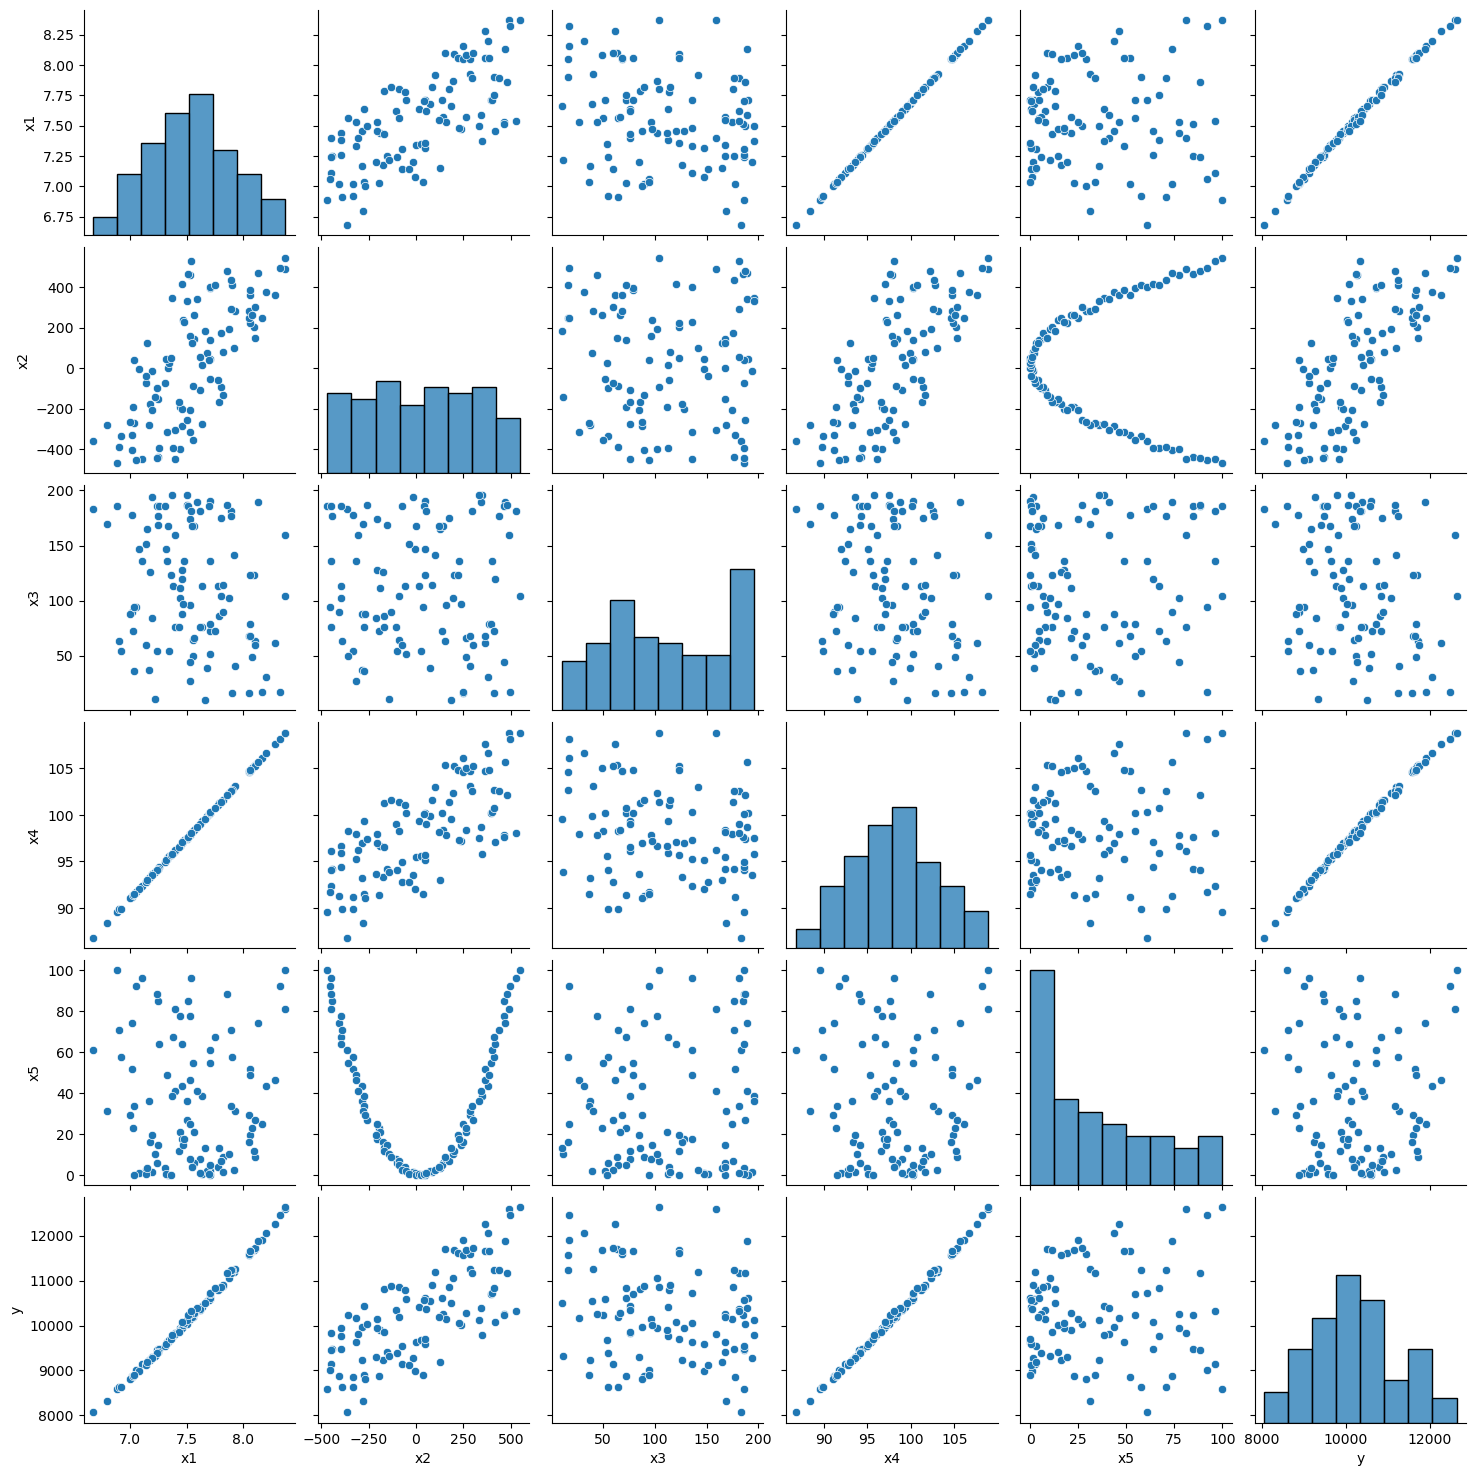

In [244]:
sns.pairplot(data)

From the correlation plot we can see predictor variables x1 and x4 have linear relationship with each other and the predicted variable y. (corr coef:0.999). Hence we can drop one of the variables. (we will drop x1)
Also, predictor variable 3 does not seem to have a correlation with any other predictor variable as well as the output. So. we can use Ridge regression to minimize it's contribution to the output variable y. For x2 and x5, x2 seems to have some relationship with y (0.7 correlation coefficient) while x5 does not. However x2 and x5 have a some sort of relationship (from the correlation plot).

In [245]:
print(data[['x2','x5']])

         x2     x5
0   -447.71  96.04
1   -455.33  92.16
2   -466.86 100.00
3   -440.53  84.64
4   -445.92  88.36
..      ...    ...
96   479.03  88.36
97   489.50  81.00
98   496.95  92.16
99   546.88 100.00
100  529.45  96.04

[101 rows x 2 columns]


<Axes: xlabel='x2', ylabel='x5'>

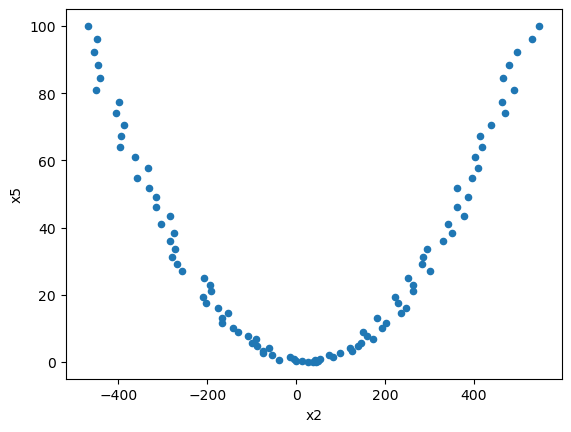

In [246]:
data.plot('x2','x5',kind='scatter') #Quadratic

Let's create new quadratic features to see if they are related to y. From the pairplot we know that x5=ax2^2+bx2+c. So we don't need to create an additional feature for x2^2. Let's create new features for all other variables including x3 because x3^2 might correlate with y.

In [262]:
from sklearn.model_selection import train_test_split
#Squaring features
data_new=data[['x4','x3','x2','x5','y']]
data_new['x5_new']=data_new['x5']*data_new['x5']
data_new['x3_new']=data_new['x3']*data_new['x3']
data_new['x4_new']=data_new['x4']*data_new['x4']
data_new['x2_new']=data_new['x2']*data_new['x2']
x_new=data_new[['x2', 'x2_new','x3','x3_new','x4','x4_new', 'x5','x5_new']]
y_new=data['y']
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=24) #splitting into train and test data


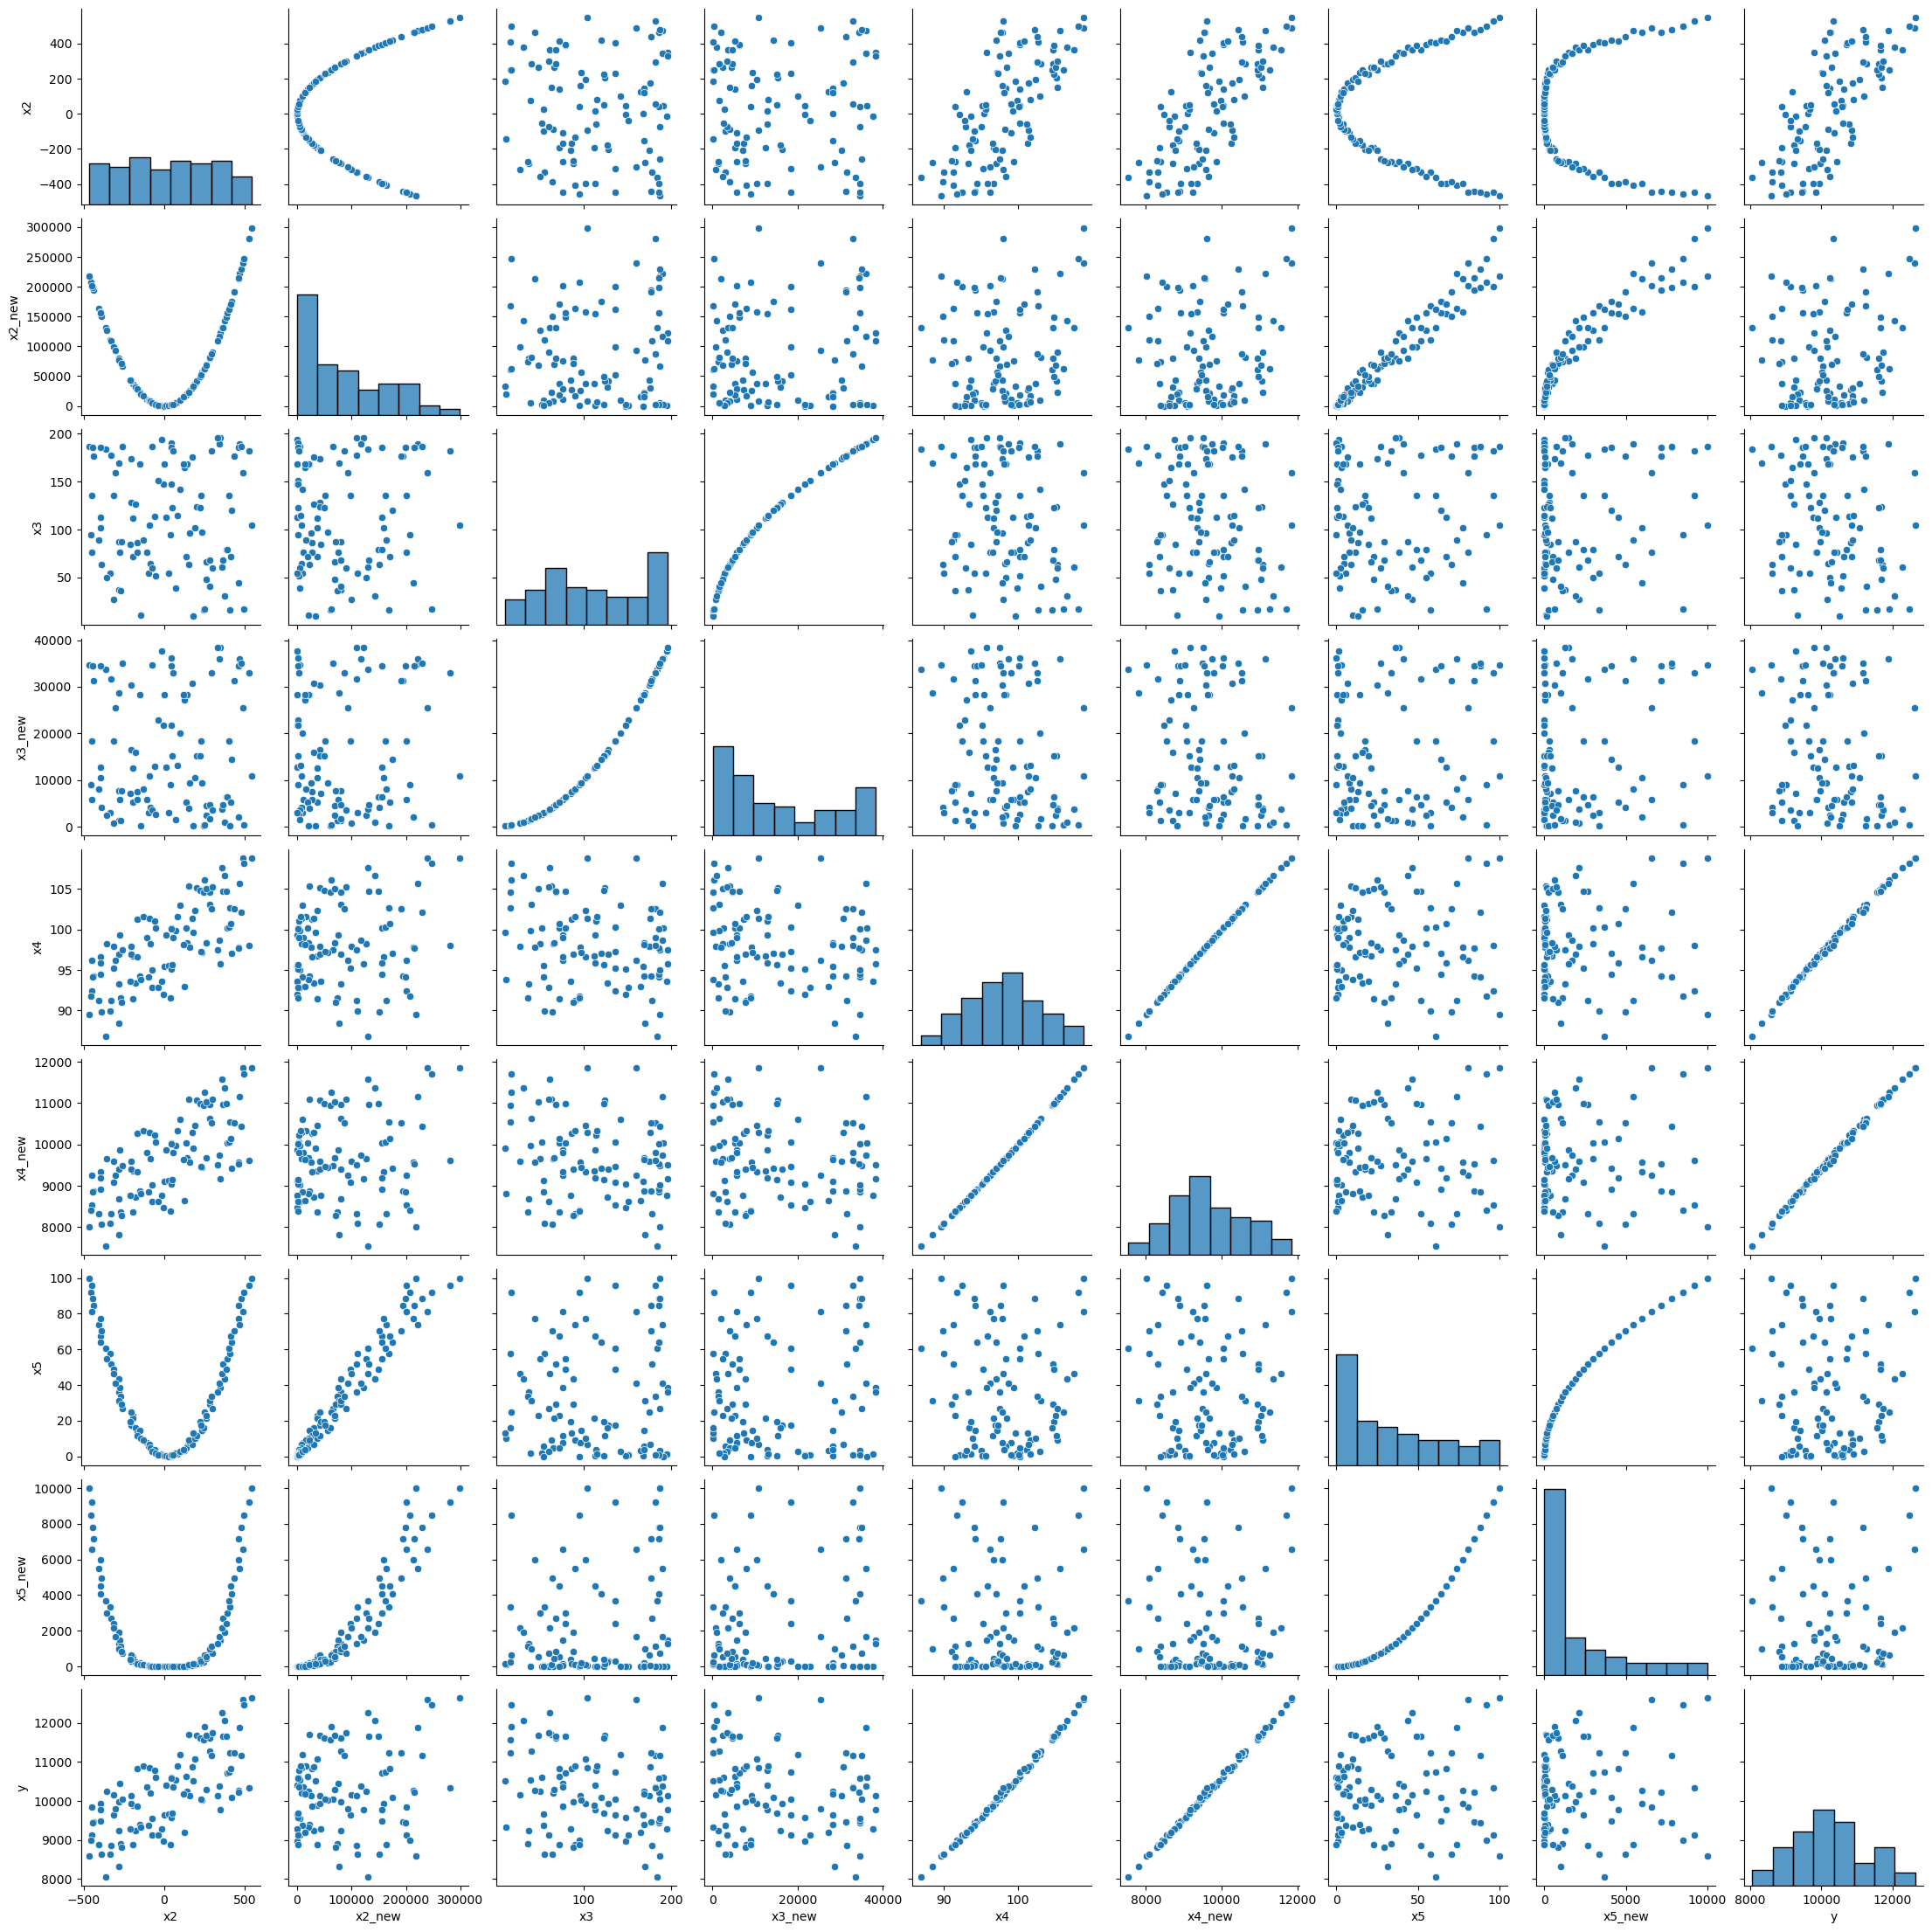

In [248]:
data_all=data_new[['x2', 'x2_new','x3','x3_new','x4','x4_new', 'x5','x5_new','y']]
sns.pairplot(data_all)

Some quadratic features seem to have a relationship with y. Let's run a regression model on these transformed features and then eliminate features based on their weights.

In [249]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
yhat = model1.predict(X_train)
loss = SSE(y_train, yhat) #Training Loss
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("Loss :",loss) 

Beta : [ 9.97110663e-02  3.55771898e-06 -5.52300803e-03  2.20600508e-05
  5.85301945e+00  9.98374429e-01  1.29474593e+00 -5.45457925e-05]  Bias : -14.940121236402774
Loss : 31.43288113620143


Training error is low enough. Let's check on test data to see if it's because of overfitting or the model is really a good fit.

In [250]:
yhat_pred = model1.predict(X_test)
loss = SSE(y_test, yhat_pred) 
print("Beta :", model1.coef_, " Bias :", model1.intercept_)

Beta : [ 9.97110663e-02  3.55771898e-06 -5.52300803e-03  2.20600508e-05
  5.85301945e+00  9.98374429e-01  1.29474593e+00 -5.45457925e-05]  Bias : -14.940121236402774


In [251]:
print('SSE: ',loss) #Test Loss
print('RMSE',np.sqrt(loss/len(y_test)))

SSE:  7.463834977280693
RMSE 0.5961717145284927


Test loss is even lower. So, no overfitting.

### From the coefficients: significant features are x2, x4, x4^2 and x5. Let's try fitting on these  features only.

# Task 3: OLS on selected and transformed features.

In [252]:
model1 = linear_model.LinearRegression()
model1.fit(X_train[['x2','x4','x4_new','x5']], y_train)
yhat = model1.predict(X_test[['x2','x4','x4_new','x5']])
loss = SSE(y_test, yhat)
print("Beta :", model1.coef_, " Bias :", model1.intercept_)
print("Loss :",loss) #Test Loss
print('RMSE',np.sqrt(loss/len(y_test)))

Beta : [0.09993194 5.81803911 0.99855529 1.29888841]  Bias : -13.487476086020251
Loss : 7.433164686262149
RMSE 0.5949455631865326


Loss has decreased SIGNIFICANTLY from baseline estimation.

Also, loss has insignificantly decreased (0.03) from the scenario where we take all the transformed features without selecting. 
APPROACH 2:
Let's try another technique: instead of removing features, let's try to see if we can further minimize the loss by reducing coefficients of irrelevant features by ridge regression.

# Ridge Regression.

In [265]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
modelridge = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01) #Using gridsearch to find the best value for hyperparameter alpha
search = GridSearchCV(modelridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print('Config: %s' % results.best_params_)



Config: {'alpha': 0.03}


In [268]:
modelridge = Ridge(alpha=0.03)
modelridge.fit(X_train, y_train)
yhat=modelridge.predict(X_test)
error=SSE(y_test,yhat)
print('SSE: ',error)
print('RMSE',np.sqrt(error/len(y_test))) #Test Loss

SSE:  7.351489574151926
RMSE 0.5916679238411295


In [269]:
yhat=modelridge.predict(x_new)


Using Ridge gives approximately the same results but has the minimum loss among all. The SSE is down by 0.13.

PLOT OF ACTUAL Y VALUES V/S THOSE PREDICTED BY RIDGE REGRESSION

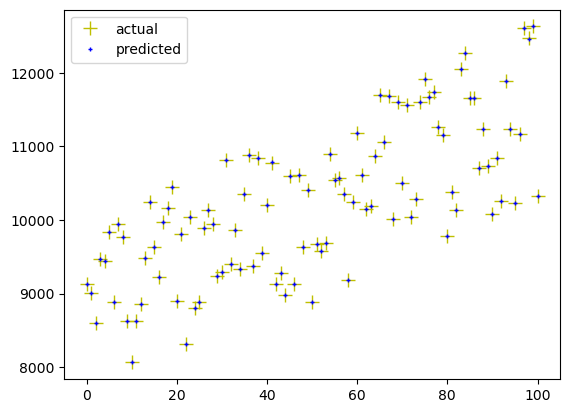

In [271]:
plt.plot(x,y_new,'y+',markersize=10)
plt.plot(x,yhat,'b+',markersize=3)
plt.legend(('actual','predicted'))

Predicted and actual outputs almost completely overlap.
Thus the Ridge model is a good fit.

# TASK 4

In [272]:
from lazypredict.Supervised import LazyRegressor

def run_lazy_regressor(df,X_train, X_test, y_train, y_test):
    X_train, X_test, y_train, y_test=X_train, X_test, y_train, y_test

     
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
    
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)

    models['RMSE'] = (models['RMSE'])
    
    print(models[['RMSE']])
    
    return models



In [259]:
lazy_models = run_lazy_regressor(data,X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:01<00:00, 32.44it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 8
[LightGBM] [Info] Start training from score 10186.997168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

COMPARISON OF LOSSES:
While for OLS Linear Regression both our model (0.59) and LazyRegressor (0.60) give the same RMSE, for Ridge Regression these errors vary significantly. (RMSE LazyRegressor: 17.47, RMSE ModelRidge= 0.59). These is because we performed GridSearch for finding the best hyperparameter (alpha) to use in regression while LazyRegressor simply uses the default hyperparameter (alpha=1.0) which is not the besr in this case.

# Potential reasons for variation of RMSE among models.

1. One reason for different RMS loss for different models can be that for all of these models the hyperparameters are not tuned and are set to default.

2. Some models AdaBoost, XGBoost, LightGBM, SupportVectorRegressor, RandomForestRegressor donot work well with low dimensional data with less complexity. These models are relatively complex and might overfit on not-so-complex data (our data can be seen as not-so-complex because simple models like linear regression OLS are performing well), hence the high RMSE.

3. Another reason can be the Bias-Variance tradeoff. Models like RandomForest and SVRegressor have low bias and high variance which can lead to high RMSE for low dimension small datasets like ours.